**Author:** [Tayyib Ul Hassan](https://github.com/tayyibgondal)

### Task 1

In [4]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import random
import time

# Initialize environment
env = gym.make("CartPole-v1")


In [5]:
# Discretize the state space
def discretize_state(state, bins):
    state_bins = []
    for i in range(len(state)):
        state_bins.append(np.digitize(state[i], bins[i]))
    return tuple(state_bins)
    
# Set the number of bins for each state dimension
position_bins = np.linspace(-2.4, 2.4, 20)  # Position
velocity_bins = np.linspace(-2.0, 2.0, 20)  # Velocity
angle_bins = np.linspace(-0.2, 0.2, 20)    # Angle
angular_velocity_bins = np.linspace(-2.0, 2.0, 20)  # Angular Velocity

bins = [position_bins, velocity_bins, angle_bins, angular_velocity_bins]
num_actions = env.action_space.n

# Initialize Q-table (state-action values)
Q_table = np.zeros([len(position_bins) + 1, len(velocity_bins) + 1,
                    len(angle_bins) + 1, len(angular_velocity_bins) + 1, num_actions])


Episode 0/20000, Total Reward: 9.0
Episode 1000/20000, Total Reward: 10.0
Episode 2000/20000, Total Reward: 9.0
Episode 3000/20000, Total Reward: 12.0
Episode 4000/20000, Total Reward: 12.0
Episode 5000/20000, Total Reward: 10.0
Episode 6000/20000, Total Reward: 10.0
Episode 7000/20000, Total Reward: 12.0
Episode 8000/20000, Total Reward: 10.0
Episode 9000/20000, Total Reward: 12.0
Episode 10000/20000, Total Reward: 9.0
Episode 11000/20000, Total Reward: 13.0
Episode 12000/20000, Total Reward: 11.0
Episode 13000/20000, Total Reward: 11.0
Episode 14000/20000, Total Reward: 11.0
Episode 15000/20000, Total Reward: 15.0
Episode 16000/20000, Total Reward: 20.0
Episode 17000/20000, Total Reward: 9.0
Episode 18000/20000, Total Reward: 10.0
Episode 19000/20000, Total Reward: 11.0


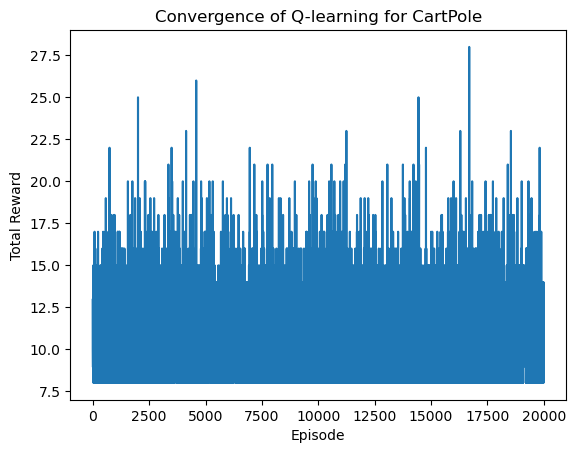

In [6]:
# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.2  # Exploration factor
num_episodes = 20000  # Number of episodes

# For tracking the return (reward) per episode
episode_returns = []

# Q-learning algorithm
for episode in range(num_episodes):
    state, _ = env.reset()
    state = discretize_state(state, bins)
    done = False
    total_reward = 0
    
    while not done:
        # Exploration vs exploitation
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q_table[state][0])  # Exploit
        
        # Take the action and observe the result
        next_state, reward, done, _, _ = env.step(action)
        next_state = discretize_state(next_state, bins)
        
        # Q-value update
        best_next_action = np.argmax(Q_table[next_state][0])
        Q_table[state][action] += alpha * (reward + gamma * Q_table[next_state][best_next_action] - Q_table[state][action])
        
        state = next_state
        total_reward += reward
        
    # Store total reward of the episode
    episode_returns.append(total_reward)

    # Optional: print progress
    if episode % 1000 == 0:
        print(f"Episode {episode}/{num_episodes}, Total Reward: {total_reward}")

# Plot the returns per episode
plt.plot(episode_returns)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Convergence of Q-learning for CartPole")
plt.show()


In [7]:
# Simulate the learned policy
state, _ = env.reset()
state = discretize_state(state, bins)
done = False
total_reward = 0

# Visualize the performance
while not done:
    env.render()
    action = np.argmax(Q_table[state][0])  # Exploit learned policy
    next_state, reward, done, _, _ = env.step(action)
    next_state = discretize_state(next_state, bins)
    state = next_state
    total_reward += reward
    time.sleep(0.05)

print(f"Total reward during simulation: {total_reward}")
env.close()


/opt/anaconda3/lib/python3.12/site-packages/gymnasium/envs/classic_control/cartpole.py:250: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


Total reward during simulation: 9.0


### Task 2

In [23]:
env = gym.make('Acrobot-v1')


In [24]:
def discretize_state(state):
    # Discretize the continuous state space (cart position, velocity, pole angle, pole velocity)
    num_bins = 24  # You can adjust the number of bins for better precision
    state_bins = []
    for i, s in enumerate(state):
        state_bins.append(np.digitize(s, np.linspace(-1, 1, num_bins)))
    return tuple(state_bins)


In [25]:
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.2  # Exploration factor (probability of choosing a random action)
num_episodes = 20000  # Number of episodes


In [26]:
action_space_size = env.action_space.n  # Number of actions in the environment
state_space_size = (24, 24, 24, 24)  # Example discretization (you can change this based on the number of bins)

# Initialize Q-table with zeros
Q = np.zeros(state_space_size + (action_space_size,))


Training Progress: 100%|██████████| 20000/20000 [09:06<00:00, 36.61it/s]


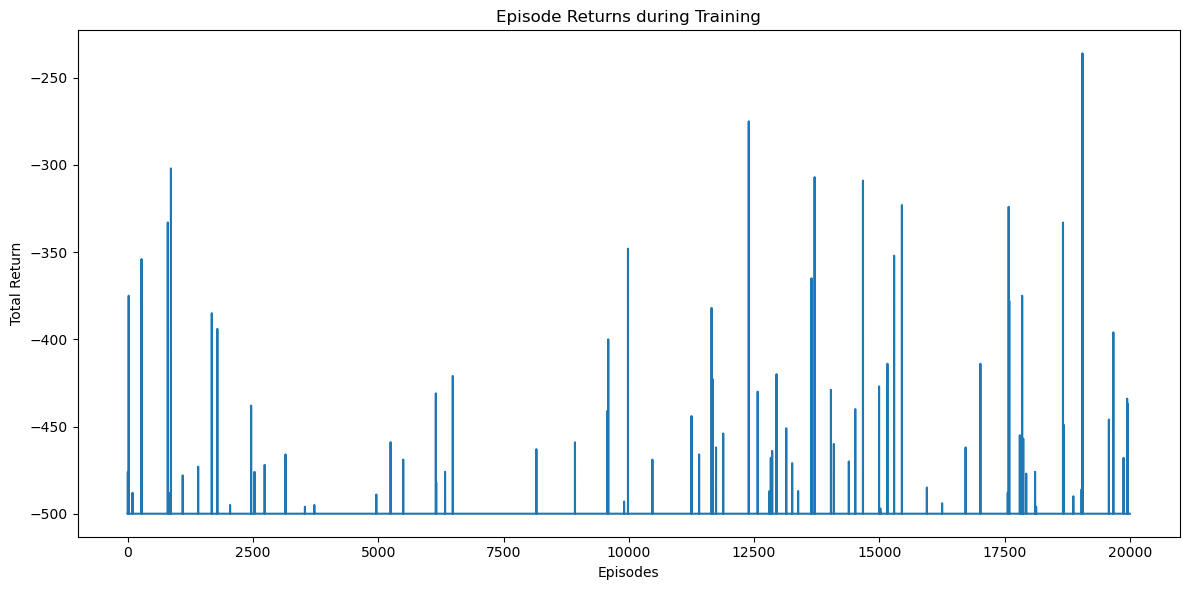

Final Reward: -500.0


In [37]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
from tqdm import tqdm

class AcrobatQLearning:
    def __init__(self, 
                 env_name='Acrobot-v1', 
                 learning_rate=0.1, 
                 discount_factor=0.9, 
                 exploration_rate=0.2, 
                 episodes=20000,
                 state_bins=10):
        """
        Q-Learning implementation for Acrobat problem with continuous state space
        
        Args:
            env_name (str): Environment name
            learning_rate (float): Learning rate (α)
            discount_factor (float): Discount factor (γ)
            exploration_rate (float): Exploration rate (ε)
            episodes (int): Number of training episodes
            state_bins (int): Number of bins for discretizing continuous state space
        """
        self.env = gym.make(env_name)
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.episodes = episodes
        
        # State space discretization
        self.state_bins = state_bins
        self.state_space_ranges = self._get_state_space_ranges()
        
        # Initialize Q-table with state discretization
        self.q_table = np.zeros((
            state_bins, state_bins, 
            state_bins, state_bins, 
            self.env.action_space.n
        ))
        
        # Tracking returns
        self.episode_returns = []
    
    def _get_state_space_ranges(self):
        """
        Determine state space ranges for discretization
        
        Returns:
            List of tuples with (min, max) for each state dimension
        """
        # Acrobot state space: 
        # [cos(theta1), sin(theta1), cos(theta2), sin(theta2), angular velocity of joint 1, angular velocity of joint 2]
        ranges = [
            (-1.0, 1.0),  # cos(theta1)
            (-1.0, 1.0),  # sin(theta1)
            (-1.0, 1.0),  # cos(theta2)
            (-1.0, 1.0),  # sin(theta2)
            (-4*np.pi, 4*np.pi),  # angular velocity 1
            (-9*np.pi, 9*np.pi)   # angular velocity 2
        ]
        return ranges[:4]  # We'll discretize first 4 dimensions
    
    def _discretize_state(self, state):
        """
        Discretize continuous state into bins
        
        Args:
            state (np.ndarray): Continuous state
        
        Returns:
            Tuple of discretized state indices
        """
        discretized_state = []
        for i, (val, (low, high)) in enumerate(zip(state[:4], self.state_space_ranges)):
            # Linear mapping to bins
            bin_index = int(np.floor(
                ((val - low) / (high - low)) * self.state_bins
            ))
            bin_index = max(0, min(bin_index, self.state_bins - 1))
            discretized_state.append(bin_index)
        
        return tuple(discretized_state)
    
    def choose_action(self, state):
        """
        Epsilon-greedy action selection
        
        Args:
            state (tuple): Discretized state
        
        Returns:
            Selected action
        """
        if np.random.random() < self.exploration_rate:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.q_table[state])
    
    def train(self):
        """
        Train the Q-Learning agent
        
        Returns:
            List of episode returns
        """
        # Use tqdm for progress tracking
        for episode in tqdm(range(self.episodes), desc="Training Progress"):
            state, _ = self.env.reset()
            discretized_state = self._discretize_state(state)
            
            total_return = 0
            done = False
            
            while not done:
                action = self.choose_action(discretized_state)
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                done = terminated or truncated
                
                # Discretize next state
                next_discretized_state = self._discretize_state(next_state)
                
                # Q-Learning update
                current_q = self.q_table[discretized_state + (action,)]
                max_next_q = np.max(self.q_table[next_discretized_state])
                
                new_q = current_q + self.learning_rate * (
                    reward + self.discount_factor * max_next_q - current_q
                )
                
                self.q_table[discretized_state + (action,)] = new_q
                
                discretized_state = next_discretized_state
                total_return += reward
                
                if done:
                    break
            
            self.episode_returns.append(total_return)
            
            # Decay exploration rate
            self.exploration_rate = max(0.01, self.exploration_rate * 0.99995)
        
        return self.episode_returns
    
    def plot_returns(self):
        """
        Plot episode returns
        """
        plt.figure(figsize=(12, 6))
        plt.plot(self.episode_returns)
        plt.title('Episode Returns during Training')
        plt.xlabel('Episodes')
        plt.ylabel('Total Return')
        plt.tight_layout()
        plt.show()
    
    def simulate_learned_policy(self, render=True):
        """
        Simulate the learned policy
        
        Args:
            render (bool): Whether to render the environment
        
        Returns:
            Total reward achieved
        """
        if render:
            env = gym.make('Acrobot-v1')
        else:
            env = self.env
        
        state, _ = env.reset()
        total_reward = 0
        done = False
        
        while not done:
            discretized_state = self._discretize_state(state)
            action = np.argmax(self.q_table[discretized_state])
            
            state, reward, terminated, truncated, _ = env.step(action)
            total_reward += reward
            
            done = terminated or truncated
            
            if render and done:
                break
        
        if render:
            env.close()
        
        return total_reward

# Demonstration
if __name__ == "__main__":
    np.random.seed(42)
    
    # Initialize and train agent
    acrobot_agent = AcrobatQLearning(
        learning_rate=0.1, 
        discount_factor=0.9, 
        exploration_rate=0.2, 
        episodes=20000
    )
    
    # Train the agent
    returns = acrobot_agent.train()
    
    # Plot returns
    acrobot_agent.plot_returns()
    
    # Simulate learned policy
    final_reward = acrobot_agent.simulate_learned_policy()
    print(f"Final Reward: {final_reward}")

### Task 3

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
Training Progress: 100%|██████████| 20000/20000 [19:11<00:00, 17.37it/s]


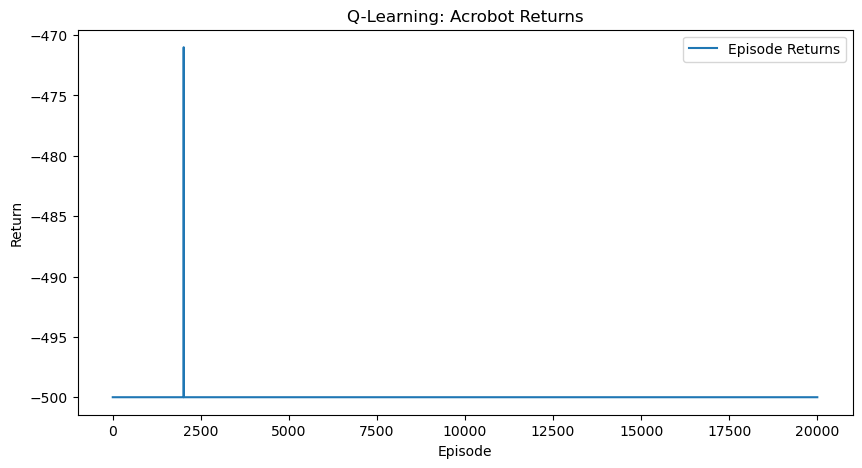

Visualization Total Reward: -500.0


In [36]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from typing import Tuple
from tqdm import tqdm

class AcrobatQLearning:
    def __init__(
        self, 
        env_name='Acrobot-v1', 
        learning_rate=0.1, 
        discount_factor=0.9, 
        exploration_rate=0.2, 
        num_episodes=20000,
        n_bins=10
    ):
        # Environment setup
        self.env = gym.make(env_name)
        
        # Hyperparameters
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.num_episodes = num_episodes
        
        # State discretization
        self.state_discretizer = KBinsDiscretizer(
            n_bins=[n_bins]*6,  # 6 state dimensions for Acrobot 
            encode='ordinal', 
            strategy='uniform'
        )
        
        # Initialize Q-table
        self.n_actions = self.env.action_space.n
        
        # Prepare discretizer
        self.discretize_states()
        
        # Q-table initialization with correct dimensionality
        self.q_table = np.zeros(
            list(self.state_discretizer.n_bins_) + [self.n_actions]
        )
    
    def discretize_states(self):
        """
        Prepare state discretizer by fitting to a sample of states
        """
        # Sample states to fit discretizer
        sample_states = []
        env = gym.make('Acrobot-v1')
        
        for _ in range(1000):
            state, _ = env.reset()
            sample_states.append(state)
        
        # Fit discretizer
        self.state_discretizer.fit(sample_states)
    
    def discretize_state(self, state):
        """
        Convert continuous state to discrete state indices
        """
        discretized = self.state_discretizer.transform([state])[0]
        return tuple(discretized.astype(int))
    
    def choose_action(self, state):
        """
        Epsilon-greedy action selection
        """
        if np.random.random() < self.exploration_rate:
            return self.env.action_space.sample()
        else:
            discretized_state = self.discretize_state(state)
            return np.argmax(self.q_table[discretized_state])
    
    def train(self) -> Tuple[list, list]:
        """
        Train the Q-Learning agent
        
        Returns:
        - Episode returns
        - Episode lengths
        """
        episode_returns = []
        episode_lengths = []
        
        # Use tqdm for progress tracking
        for episode in tqdm(range(self.num_episodes), desc="Training Progress"):
            state, _ = self.env.reset()
            total_return = 0
            done = False
            truncated = False
            
            while not (done or truncated):
                # Choose action
                action = self.choose_action(state)
                
                # Take action
                next_state, reward, done, truncated, _ = self.env.step(action)
                
                # Discretize states
                curr_state_discrete = self.discretize_state(state)
                next_state_discrete = self.discretize_state(next_state)
                
                # Q-Learning update
                best_next_action = np.argmax(
                    self.q_table[next_state_discrete]
                )
                
                # Q-value update
                td_target = reward + self.discount_factor * \
                    self.q_table[next_state_discrete + (best_next_action,)]
                td_error = td_target - \
                    self.q_table[curr_state_discrete + (action,)]
                
                self.q_table[curr_state_discrete + (action,)] += \
                    self.learning_rate * td_error
                
                # Update state and return
                state = next_state
                total_return += reward
            
            # Record episode statistics
            episode_returns.append(total_return)
            episode_lengths.append(episode)
        
        return episode_returns, episode_lengths
    
    def visualize_performance(self):
        """
        Visualize learned policy
        """
        env = gym.make('Acrobot-v1')
        state, _ = env.reset()
        done = False
        truncated = False
        total_reward = 0
        
        while not (done or truncated):
            action = self.choose_action(state)
            state, reward, done, truncated, _ = env.step(action)
            total_reward += reward
        
        env.close()
        print(f"Visualization Total Reward: {total_reward}")
    
    def plot_training_progress(self, episode_returns):
        """
        Plot training returns
        """
        plt.figure(figsize=(10, 5))
        plt.plot(
            range(len(episode_returns)), 
            episode_returns, 
            label='Episode Returns'
        )
        plt.title('Q-Learning: Acrobot Returns')
        plt.xlabel('Episode')
        plt.ylabel('Return')
        plt.legend()
        plt.show()

# Main execution
def main():
    np.random.seed(42)  # For reproducibility
    
    # Initialize and train agent
    agent = AcrobatQLearning(
        learning_rate=0.1, 
        discount_factor=0.9, 
        exploration_rate=0.2, 
        num_episodes=20000
    )
    
    # Train the agent
    episode_returns, episode_lengths = agent.train()
    
    # Plot training progress
    agent.plot_training_progress(episode_returns)
    
    # Visualize learned policy
    agent.visualize_performance()

if __name__ == '__main__':
    main()

### Task 4

Training Progress: 100%|██████████| 20000/20000 [07:36<00:00, 43.83it/s]


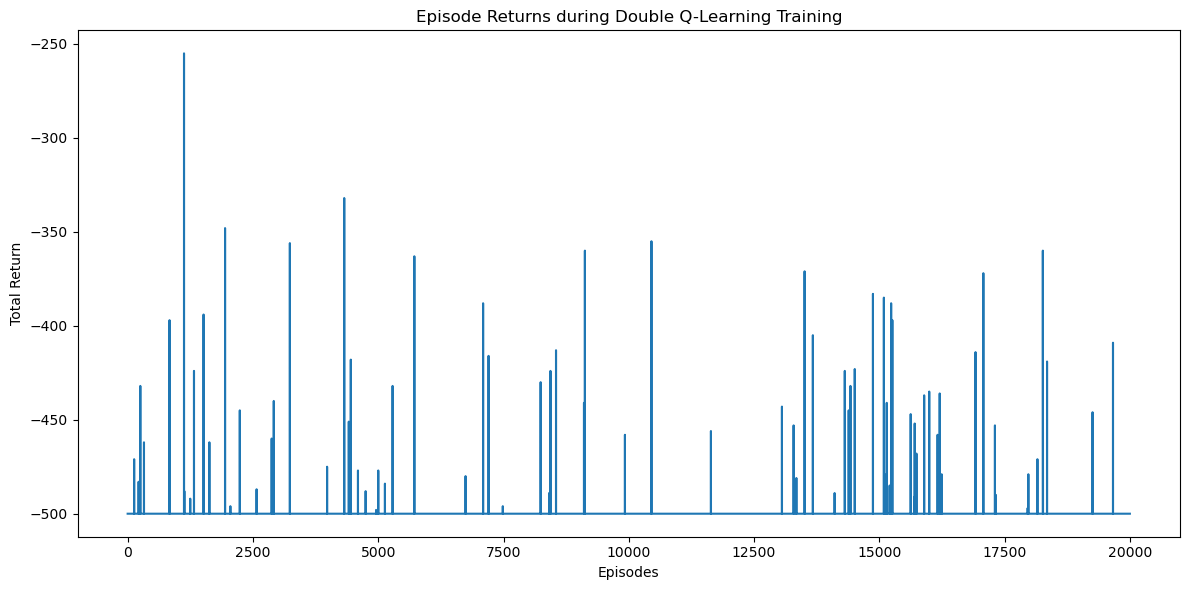

Final Reward: -500.0


In [35]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
from tqdm import tqdm

class AcrobatDoubleQLearning:
    def __init__(self, 
                 env_name='Acrobot-v1', 
                 learning_rate=0.1, 
                 discount_factor=0.9, 
                 exploration_rate=0.2, 
                 episodes=20000,
                 state_bins=10):
        """
        Double Q-Learning implementation for Acrobot problem
        
        Args:
            env_name (str): Environment name
            learning_rate (float): Learning rate (α)
            discount_factor (float): Discount factor (γ)
            exploration_rate (float): Exploration rate (ε)
            episodes (int): Number of training episodes
            state_bins (int): Number of bins for discretizing continuous state space
        """
        self.env = gym.make(env_name)
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.episodes = episodes
        
        # State space discretization
        self.state_bins = state_bins
        self.state_space_ranges = self._get_state_space_ranges()
        
        # Initialize two Q-tables for Double Q-Learning
        self.q_table_a = np.zeros((
            state_bins, state_bins, 
            state_bins, state_bins, 
            self.env.action_space.n
        ))
        self.q_table_b = np.zeros_like(self.q_table_a)
        
        # Tracking returns
        self.episode_returns = []
    
    def _get_state_space_ranges(self):
        """
        Determine state space ranges for discretization
        
        Returns:
            List of tuples with (min, max) for each state dimension
        """
        # Acrobot state space: first 4 dimensions 
        ranges = [
            (-1.0, 1.0),  # cos(theta1)
            (-1.0, 1.0),  # sin(theta1)
            (-1.0, 1.0),  # cos(theta2)
            (-1.0, 1.0),  # sin(theta2)
            (-4*np.pi, 4*np.pi),  # angular velocity 1
            (-9*np.pi, 9*np.pi)   # angular velocity 2
        ]
        return ranges[:4]  # We'll discretize first 4 dimensions
    
    def _discretize_state(self, state):
        """
        Discretize continuous state into bins
        
        Args:
            state (np.ndarray): Continuous state
        
        Returns:
            Tuple of discretized state indices
        """
        discretized_state = []
        for i, (val, (low, high)) in enumerate(zip(state[:4], self.state_space_ranges)):
            # Linear mapping to bins
            bin_index = int(np.floor(
                ((val - low) / (high - low)) * self.state_bins
            ))
            bin_index = max(0, min(bin_index, self.state_bins - 1))
            discretized_state.append(bin_index)
        
        return tuple(discretized_state)
    
    def choose_action(self, state, q_table_a, q_table_b):
        """
        Epsilon-greedy action selection
        
        Args:
            state (tuple): Discretized state
            q_table_a (np.ndarray): First Q-table
            q_table_b (np.ndarray): Second Q-table
        
        Returns:
            Selected action
        """
        if np.random.random() < self.exploration_rate:
            return self.env.action_space.sample()
        else:
            # Combine Q-values from both tables
            combined_q_values = q_table_a[state] + q_table_b[state]
            return np.argmax(combined_q_values)
    
    def train(self):
        """
        Train the Double Q-Learning agent
        
        Returns:
            List of episode returns
        """
        # Use tqdm for progress tracking
        for episode in tqdm(range(self.episodes), desc="Training Progress"):
            state, _ = self.env.reset()
            discretized_state = self._discretize_state(state)
            
            total_return = 0
            done = False
            
            while not done:
                # Alternate between Q-tables for action selection and updates
                if np.random.random() < 0.5:
                    q_table_primary, q_table_target = self.q_table_a, self.q_table_b
                else:
                    q_table_primary, q_table_target = self.q_table_b, self.q_table_a
                
                # Choose action
                action = self.choose_action(discretized_state, self.q_table_a, self.q_table_b)
                
                # Take action
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                done = terminated or truncated
                
                # Discretize next state
                next_discretized_state = self._discretize_state(next_state)
                
                # Double Q-Learning update
                if np.random.random() < 0.5:
                    # Select best action using primary Q-table
                    best_next_action = np.argmax(q_table_primary[next_discretized_state])
                    
                    # Get Q-value using target Q-table
                    max_next_q = q_table_target[next_discretized_state][best_next_action]
                else:
                    # Reverse the roles
                    best_next_action = np.argmax(q_table_target[next_discretized_state])
                    max_next_q = q_table_primary[next_discretized_state][best_next_action]
                
                # Q-value update
                current_q = q_table_primary[discretized_state + (action,)]
                new_q = current_q + self.learning_rate * (
                    reward + self.discount_factor * max_next_q - current_q
                )
                
                q_table_primary[discretized_state + (action,)] = new_q
                
                discretized_state = next_discretized_state
                total_return += reward
                
                if done:
                    break
            
            self.episode_returns.append(total_return)
            
            # Decay exploration rate
            self.exploration_rate = max(0.01, self.exploration_rate * 0.99995)
        
        return self.episode_returns
    
    def plot_returns(self):
        """
        Plot episode returns
        """
        plt.figure(figsize=(12, 6))
        plt.plot(self.episode_returns)
        plt.title('Episode Returns during Double Q-Learning Training')
        plt.xlabel('Episodes')
        plt.ylabel('Total Return')
        plt.tight_layout()
        plt.show()
    
    def simulate_learned_policy(self, render=True):
        """
        Simulate the learned policy
        
        Args:
            render (bool): Whether to render the environment
        
        Returns:
            Total reward achieved
        """
        if render:
            env = gym.make('Acrobot-v1', render_mode='human')
        else:
            env = self.env
        
        state, _ = env.reset()
        total_reward = 0
        done = False
        
        while not done:
            discretized_state = self._discretize_state(state)
            
            # Combine Q-values from both tables
            combined_q_values = self.q_table_a[discretized_state] + self.q_table_b[discretized_state]
            action = np.argmax(combined_q_values)
            
            state, reward, terminated, truncated, _ = env.step(action)
            total_reward += reward
            
            done = terminated or truncated
            
            if render and done:
                break
        
        if render:
            env.close()
        
        return total_reward

# Demonstration
if __name__ == "__main__":
    np.random.seed(42)
    
    # Initialize and train agent
    acrobot_agent = AcrobatDoubleQLearning(
        learning_rate=0.1, 
        discount_factor=0.9, 
        exploration_rate=0.2, 
        episodes=20000
    )
    
    # Train the agent
    returns = acrobot_agent.train()
    
    # Plot returns
    acrobot_agent.plot_returns()
    
    # Simulate learned policy
    final_reward = acrobot_agent.simulate_learned_policy()
    print(f"Final Reward: {final_reward}")